#Instalamos Librerias

In [ ]:
!pip install PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


from google.colab import files

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id_train_labels = '1o8fEed65R8219m5iOJoZgvHXaTGwWE4H'
id_train_values = "1RCoa3FWbpcHVC6imhaQQFQEAWNW0qkh0" 
id_test_values = '1xBGPZbt3BYxe1OOYGMJuGnXe_pEqFZ1a'
id_submission_format = "1ei8BhsAAhZpZ8sRqEOVGl12y0JAPdXGV"

downloaded_train_labels = drive.CreateFile({'id': id_train_labels})
downloaded_train_values = drive.CreateFile({'id': id_train_values})
downloaded_test_values = drive.CreateFile({'id': id_test_values})
downloaded_submission_format = drive.CreateFile({'id': id_submission_format})

downloaded_train_labels.GetContentFile('train_labels.csv')
downloaded_train_values.GetContentFile('train_values.csv')
downloaded_test_values.GetContentFile('test_values.csv')
downloaded_submission_format.GetContentFile('submission_format.csv')

In [5]:
train_values = pd.read_csv('train_values.csv', dtype={
    'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})
train_labels = pd.read_csv('train_labels.csv', dtype={
    'damage_grade': 'int16'
})

test_values = pd.read_csv('test_values.csv', dtype={
    'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})

In [6]:
labels_and_values = pd.merge(train_labels, train_values, how='inner', on='building_id')

##Encodeamos con one hot

In [7]:
test_values = pd.get_dummies(test_values, columns=['land_surface_condition'], drop_first=True)
test_values = pd.get_dummies(test_values, columns=['foundation_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['roof_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['ground_floor_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['plan_configuration'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['position'],drop_first=True)

In [8]:
labels_and_values = pd.get_dummies(labels_and_values, columns=['land_surface_condition'], drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['foundation_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['roof_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['ground_floor_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['plan_configuration'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['position'],drop_first=True)

In [9]:
data = labels_and_values.loc[labels_and_values["age"] <995] #Acá hacemos filtrado

In [10]:
features = data[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage','age',"height_percentage",'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',	"land_surface_condition_o",	"land_surface_condition_t",
    "foundation_type_i","foundation_type_r",	"foundation_type_u","foundation_type_w",	"roof_type_q",	"roof_type_x",	"ground_floor_type_m",
    "ground_floor_type_v","ground_floor_type_x",	"ground_floor_type_z"]]

In [ ]:
test_values_features = test_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage','age',"height_percentage",'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',"land_surface_condition_o",	"land_surface_condition_t",
    "foundation_type_i","foundation_type_r",	"foundation_type_u","foundation_type_w",	"roof_type_q",	"roof_type_x",	"ground_floor_type_m",
    "ground_floor_type_v","ground_floor_type_x",	"ground_floor_type_z"]]

In [11]:
prediction = data['damage_grade']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, prediction, test_size=0.2, random_state=0)

In [13]:
modelo_RF = RandomForestClassifier(random_state=1, n_estimators=100)
modelo_RF.fit(X_train, y_train) #entrenamos el modelo
prediccion = modelo_RF.predict(X_test)

In [ ]:
prediccion_test_values = modelo_RF.predict(test_values_features)

In [14]:
f1_score(prediccion, y_test, average='micro') #es la precision

0.7175510676465481

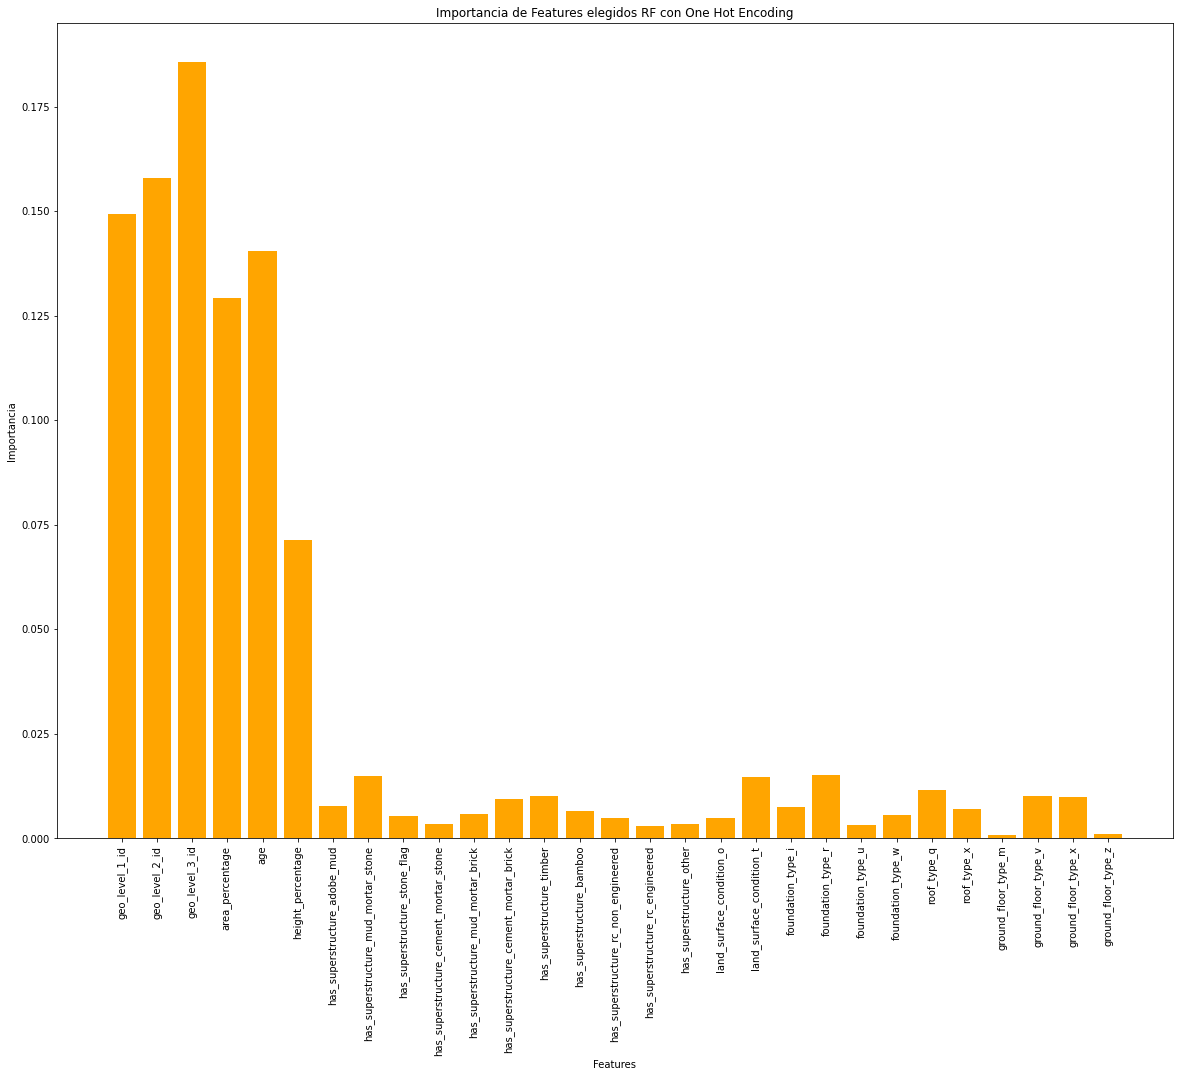

In [15]:
plt.subplots(figsize=(20,15))
plt.bar(X_train.columns, modelo_RF.feature_importances_, color = "orange")
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia de Features elegidos RF con One Hot Encoding')
plt.xticks(rotation=90)

plt.show()